# Dataset

In [1]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1)

X, y = mnist["data"], mnist["target"]

print ("X.shape: ", X.shape)
print ("y.shape: ", y.shape)
print ("\n Mnist Keys: ", mnist.keys())

c:\Users\Killer\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\datasets\_openml.py:932: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


X.shape:  (70000, 784)
y.shape:  (70000,)

 Mnist Keys:  dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])


Total = 70.000 images, 60.000 to train, 10.000 to evaluation

In [2]:
X_train, X_test, y_train, y_test = X[:60000] / 255., X[60000:] / 255., y[:60000], y[60000:]

In [3]:
print ("X_train.shape: ", X_train.shape)
print ("y_train.shape: ", y_train.shape)
print ("X_test.shape: ", X_test.shape)
print ("y_test.shape: ", y_test.shape)

X_train.shape:  (60000, 784)
y_train.shape:  (60000,)
X_test.shape:  (10000, 784)
y_test.shape:  (10000,)


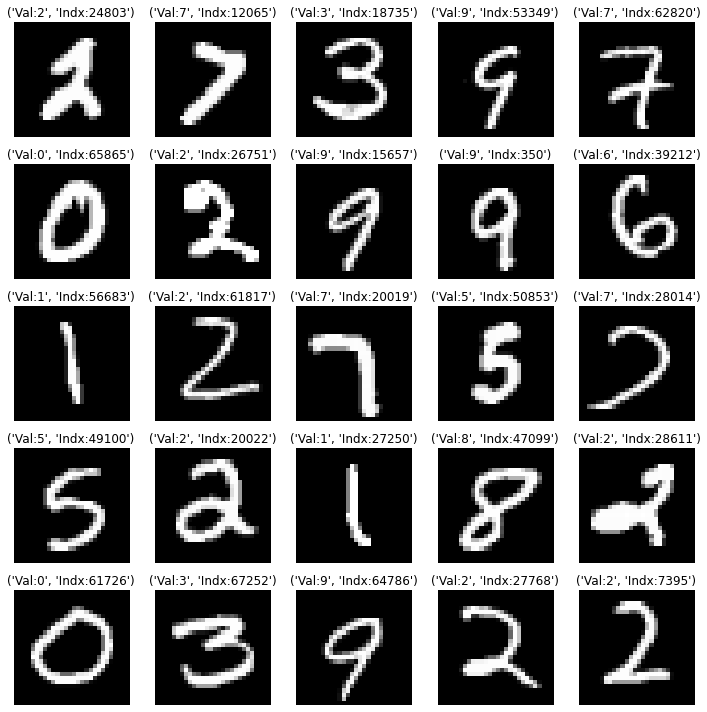

In [4]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
import random 
import numpy as np

img_size = 28
# img_size = 28 * 28 pixels = 784 pixels
r, c = 5, 5
fig = plt.figure(figsize=(2*c, 2*r))
for _r in range(r):
    for _c in range(c):
        plt.subplot(r, c, _r*c + _c + 1)
        ix = random.randint(0, len(X)-1)
        img = np.array(X.iloc[ix]).reshape(img_size, img_size)
        plt.imshow(img, cmap='gray')
        plt.axis("off")
        title = "Val:" + str(y[ix]), "Indx:" + str(ix)
        plt.title(title)
plt.tight_layout()
plt.show()


To carry out a binary classification task we need our data set to be divided into two classes, however the MNIST data set, as we have already seen, has $10$ classes (all digits between $0$ and $9$). In this case we are going to train a model to classify the images with the number $5$ from the rest.

In [5]:
import numpy as np

y_train_5 = (y_train == '5').astype(np.int8)
y_test_5 = (y_test == '5').astype(np.int8)

In [6]:
# Float Precision examples

a = np.array([0.123456789121212,2,3], dtype=np.float16)
print("16bit: ", a[0])

a = np.array([0.123456789121212,2,3], dtype=np.float32)
print("32bit: ", a[0])

b = np.array([0.123456789121212121212,2,3], dtype=np.float64)
print("64bit: ", b[0])

# float8 are not supported in numpy
# lower precision in float accelerates the computation training
# lower precision in float reduces the memory usage
# float8 is 8 times more faster than float64 in training and 8 times less memory usage
# lower precision in float produces less accurate results

16bit:  0.1235
32bit:  0.12345679
64bit:  0.12345678912121212


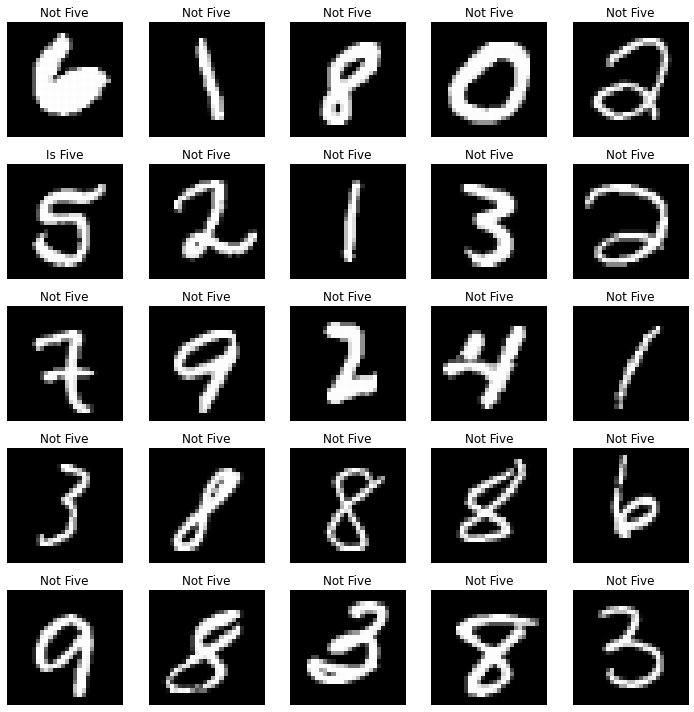

In [7]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
import random 
import numpy as np

img_size = 28
# img_size = 28 * 28 pixels = 784 pixels
r, c = 5, 5
fig = plt.figure(figsize=(2*c, 2*r))
for _r in range(r):
    for _c in range(c):
        plt.subplot(r, c, _r*c + _c + 1)
        ix = random.randint(0, len(X_train)-1)
        img = np.array(X_train.iloc[ix]).reshape(img_size, img_size)
        plt.imshow(img, cmap='gray')
        plt.axis("off")
        if y_train_5[ix] == 1:
            title = "Is Five"
        else:
            title = "Not Five"
        plt.title(title)
plt.tight_layout()
plt.show()

In [8]:
def bce(y, y_hat):
    return - np.mean(y*np.log(y_hat) - (1 - y)*np.log(1 - y_hat))

def sigmoid(x):
  return 1 / (1 + np.exp(-x))

class Perceptron():
  def __init__(self, size):
    scale = np.sqrt(2/(size+1)) # standard deviation
    size = (size,) # quantity of weights
    # initialize weights on self.w with a normal distribution
    self.w = np.random.normal(loc=0.0, scale = scale, size = size) 
    self.ws = []
    self.activation = sigmoid
    self.loss = bce
    
  def __call__(self, w, x):
    return self.activation(np.dot(x, w)) 
    # np.dot is the dot product of two arrays (matrix multiplication)

  def fit(self, x, y, epochs, lr, verbose=True):
    x = np.c_[np.ones(len(x)), x]
    for epoch in range(1,epochs+1):
        # Batch Gradient Descent
        y_hat = self(self.w, x)  
        # Loss function
        l = self.loss(y, y_hat)
        # derivadas
        dldh = (y_hat - y)
        dhdw = x
        dldw = np.dot(dldh, dhdw)
        # update weights
        self.w = self.w - lr*dldw
        # save weights for animation
        self.ws.append(self.w.copy())
        # print loss
        if verbose:
            print(f"Epoch {epoch}/{epochs} Loss {l}")

np.random.seed(42)

perceptron = Perceptron(X.shape[1] + 1)
epochs, lr = 10, 1e-5
perceptron.fit(X_train, y_train_5, epochs, lr)

Epoch 1/10 Loss -0.5548410142855105
Epoch 2/10 Loss 0.7206598224991427
Epoch 3/10 Loss 0.5304482677090414
Epoch 4/10 Loss 0.3387412138758039
Epoch 5/10 Loss 0.14817873671774645
Epoch 6/10 Loss 0.02999051884537082
Epoch 7/10 Loss 0.07018573941348852
Epoch 8/10 Loss 0.03957115693418076
Epoch 9/10 Loss 0.053798900444024085
Epoch 10/10 Loss 0.0419895655402817


# Metrics for evaluation

In [9]:
def evaluate(perceptron, x, t = 0.5):
    w = perceptron.ws[-1]
    x = np.c_[np.ones(len(x)), x]
    y = perceptron(w, x)
    return (y > t).astype(np.int8)

# Accuracy

In [10]:
def accuracy(y_pred, y):
    return np.sum(y_pred == y) / len(y)

y_pred = evaluate(perceptron, X_train)
print("Train Accuracy: ", accuracy(y_pred, y_train_5))

y_pred = evaluate(perceptron, X_test)
print("Test Accuracy: ", accuracy(y_pred, y_test_5))
print ("y_train_5.mean(): ", y_train_5.mean(), "y_test_5.mean(): ", y_test_5.mean())
print ("the model predicts 5 with 90% accuracy on the test set")

Train Accuracy:  0.9196666666666666
Test Accuracy:  0.9232
y_train_5.mean():  0.09035 y_test_5.mean():  0.0892
the model predicts 5 with 90% accuracy on the test set


In [11]:
# the model predicts 5 with 90% accuracy on the test set
# the problem is that the dataset is not balanced, there are only 10% of 5's
# the model predicts practically everything as not 5
# the model can´t learn to predict 5's
# the model is not learning, and the accuracy is not improving

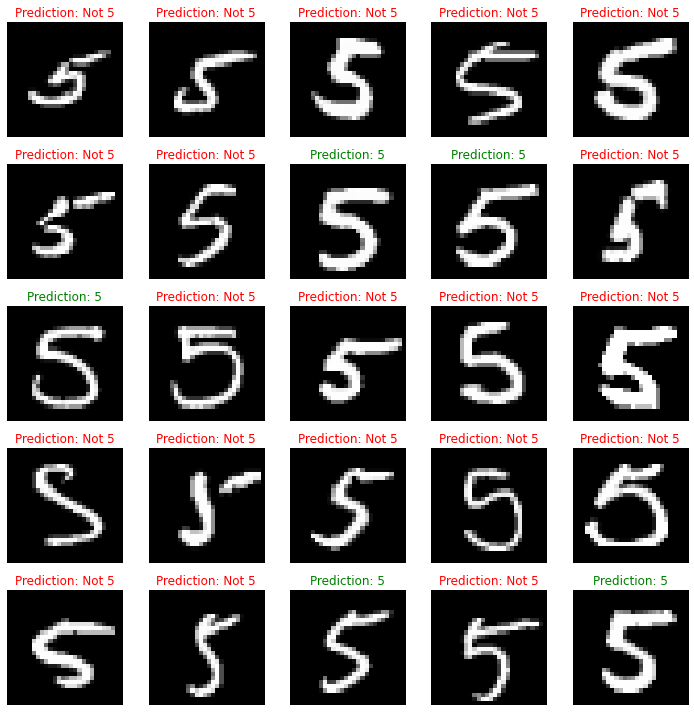

In [12]:
r, c = 5, 5
fig = plt.figure(figsize=(2*c, 2*r))
img_size = 28
for _r in range(r):
    for _c in range(c):
        plt.subplot(r, c, _r*c + _c + 1)
        fives = (y_test_5 == 1)
        ix = random.randint(0, len(y_test_5[fives])-1)
        img = X_test[fives].iloc[ix]
        img_rs = np.array(img).reshape(img_size, img_size)
        plt.imshow(img_rs, cmap='gray')
        plt.axis("off")
        y_pred = evaluate(perceptron, [img])
        if y_pred[0] == y_test_5[fives].iloc[ix]:
            title = "Prediction: 5"
            color = "green"
        else:
            title = "Prediction: Not 5"
            color = "red"
        plt.title(title, color=color)
plt.tight_layout()
plt.show()

In [13]:
# with more epochs the model learns to predict 5's better

perceptron = Perceptron(X.shape[1] + 1)
epochs, lr = 300, 1e-5
perceptron.fit(X_train, y_train_5, epochs, lr, verbose=False)
y_pred = evaluate(perceptron, X_train)
print("Train Accuracy: ", accuracy(y_pred, y_train_5))

y_pred = evaluate(perceptron, X_test)
print("Test Accuracy: ", accuracy(y_pred, y_test_5))
print ("y_train_5.mean(): ", y_train_5.mean(), "y_test_5.mean(): ", y_test_5.mean())

Train Accuracy:  0.9669666666666666
Test Accuracy:  0.9693
y_train_5.mean():  0.09035 y_test_5.mean():  0.0892


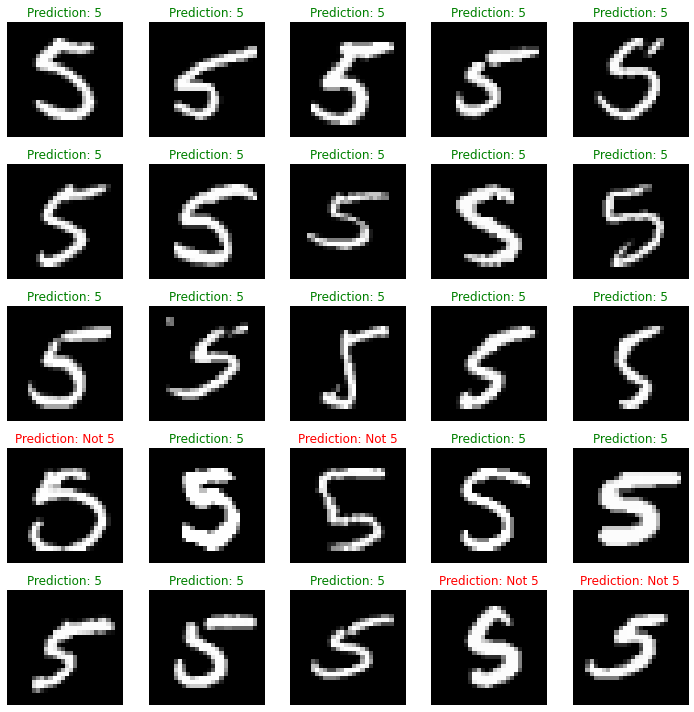

In [14]:
r, c = 5, 5
fig = plt.figure(figsize=(2*c, 2*r))
img_size = 28
for _r in range(r):
    for _c in range(c):
        plt.subplot(r, c, _r*c + _c + 1)
        fives = (y_test_5 == 1)
        ix = random.randint(0, len(y_test_5[fives])-1)
        img = X_test[fives].iloc[ix]
        img_rs = np.array(img).reshape(img_size, img_size)
        plt.imshow(img_rs, cmap='gray')
        plt.axis("off")
        y_pred = evaluate(perceptron, [img])
        if y_pred[0] == y_test_5[fives].iloc[ix]:
            title = "Prediction: 5"
            color = "green"
        else:
            title = "Prediction: Not 5"
            color = "red"
        plt.title(title, color=color)
plt.tight_layout()
plt.show()

Best prediction but still not good enough

In [15]:
def accuracy(y_pred, y):
    return np.sum(y_pred == y) / len(y)

y_pred = evaluate(perceptron, X_test)
print("Test Accuracy: ", accuracy(y_pred, y_test_5))
print ("y_train_5.mean(): ", y_train_5.mean(), "y_test_5.mean(): ", y_test_5.mean())

TP = np.sum((y_pred == 1) & (y_test_5 == 1)) 
TN = np.sum((y_pred == 0) & (y_test_5 == 0)) 
FP = np.sum((y_pred == 1) & (y_test_5 == 0))
FN = np.sum((y_pred == 0) & (y_test_5 == 1))

CM = [[TN, FP],
      [FN, TP]]

print("Confusion Matrix: ")
print(CM, "\n")
print ("True Positives: ", TP)
print ("False Positives: ", FP)

print ("\nTrue Negatives: ", TN)
print ("False Negatives: ", FN)

Test Accuracy:  0.9693
y_train_5.mean():  0.09035 y_test_5.mean():  0.0892
Confusion Matrix: 
[[9038, 70], [237, 655]] 

True Positives:  655
False Positives:  70

True Negatives:  9038
False Negatives:  237


### *Precision* y *Recall*

$$ precision = \frac{TP}{TP+FP} $$

$$ recall = \frac{TP}{TP+FN} $$

In the following image you can see a visualization of these metrics. *Precision* gives us an idea of ​​how prone our model is to giving false positives. A value close to $1$ will indicate that our model gives hardly any false positives (although it may still fail to give false negatives) while a value close to $0$ will indicate that our model gives many false positives. The same applies to *Recall*, but in this case applied to false negatives. A value close to $1$ will indicate that our model gives hardly any false negatives (although it may still fail to give false positives) while a value close to $0$ will indicate that our model gives many false negatives.

In [16]:
print ("Precision: ", TP/(TP+FP))
print ("Recall: ", TP/(TP+FN))

Precision:  0.903448275862069
Recall:  0.734304932735426


![](https://upload.wikimedia.org/wikipedia/commons/thumb/2/26/Precisionrecall.svg/800px-Precisionrecall.svg.png)

Depending on the application in which we are working, we will want to optimize one metric or another. In applications where having false positives is detrimental (eg security applications) we will want models with good *precision*, while in applications where having false negatives is detrimental (eg medical diagnostic systems) we will want models with good *recall*. Once our model has been trained, we can adjust these metrics by varying the value of the *threshold* used in the evaluation. This is known as the *precision-recall trade off*.

In [17]:
def confusion_matrix(y_pred, y):
    TP = np.sum((y_pred == 1) & (y == 1)) 
    TN = np.sum((y_pred == 0) & (y == 0)) 
    FP = np.sum((y_pred == 1) & (y == 0))
    FN = np.sum((y_pred == 0) & (y == 1))
    accuracy = (TP + TN) / (TP + TN + FP + FN)
    precision = TP / (TP + FP)
    recall = TP / (TP + FN)
    f1_score = 2 * (precision * recall) / (precision + recall)
    metrics = {
        "TP": TP,
        "TN": TN,
        "FP": FP,
        "FN": FN,
        "accuracy": accuracy,
        "precision": precision,
        "recall": recall,
        "f1_score": f1_score
    }
    return metrics

for t in np.linspace(0.01,0.99,28):
    y_pred = evaluate(perceptron, X_test, t)
    metrics = confusion_matrix(y_pred, y_test_5)
    t = t
    print (
        f"Threshold: {t:.3f} | F1 Score {metrics['f1_score']:.4f} | Accuracy {metrics['accuracy']:.4f} | Precision {metrics['precision']:.4f} | Recall {metrics['recall']:.4f} | TP {metrics['TP']} - TN {metrics['TN']} | FP {metrics['FP']} - FN {metrics['FN']}"
    )

Threshold: 0.010 | F1 Score 0.3274 | Accuracy 0.6409 | Precision 0.1965 | Recall 0.9798 | TP 874 - TN 5535 | FP 3573 - FN 18
Threshold: 0.046 | F1 Score 0.5234 | Accuracy 0.8459 | Precision 0.3614 | Recall 0.9484 | TP 846 - TN 7613 | FP 1495 - FN 46
Threshold: 0.083 | F1 Score 0.6186 | Accuracy 0.8984 | Precision 0.4650 | Recall 0.9238 | TP 824 - TN 8160 | FP 948 - FN 68
Threshold: 0.119 | F1 Score 0.6893 | Accuracy 0.9268 | Precision 0.5546 | Recall 0.9103 | TP 812 - TN 8456 | FP 652 - FN 80
Threshold: 0.155 | F1 Score 0.7359 | Accuracy 0.9428 | Precision 0.6256 | Recall 0.8935 | TP 797 - TN 8631 | FP 477 - FN 95
Threshold: 0.191 | F1 Score 0.7631 | Accuracy 0.9510 | Precision 0.6709 | Recall 0.8845 | TP 789 - TN 8721 | FP 387 - FN 103
Threshold: 0.228 | F1 Score 0.7896 | Accuracy 0.9587 | Precision 0.7236 | Recall 0.8688 | TP 775 - TN 8812 | FP 296 - FN 117
Threshold: 0.264 | F1 Score 0.8043 | Accuracy 0.9632 | Precision 0.7652 | Recall 0.8475 | TP 756 - TN 8876 | FP 232 - FN 136
Thr

lower threshold, lower false negatives, higher false positives, lower precision

higher threshold, higher false negatives, lower false positives, higher precision

In [18]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, confusion_matrix, f1_score
# using sklearn

y_pred = evaluate(perceptron, X_test)

print ("precision_score: ", precision_score(y_test_5, y_pred))
print ("recall_score: ", recall_score(y_test_5, y_pred))
print ("accuracy_score: ", accuracy_score(y_test_5, y_pred))
print ("f1_score: ", f1_score(y_test_5, y_pred))
print ("confusion_matrix: ", confusion_matrix(y_test_5, y_pred))

precision_score:  0.903448275862069
recall_score:  0.734304932735426
accuracy_score:  0.9693
f1_score:  0.8101422387136673
confusion_matrix:  [[9038   70]
 [ 237  655]]


# ROC Curve

We can quickly visualize the behavior of a model for various *thresholds* with the so-called ROC curve (*Receiver Operating Characteristic*). In it we represent the true positive ratio (TPR) against the false positive ratio (FPR), defined as follows:

$$ TPR = \frac{TP}{TP+FN} $$

$$ FPR = \frac{FP}{FP+TN} $$

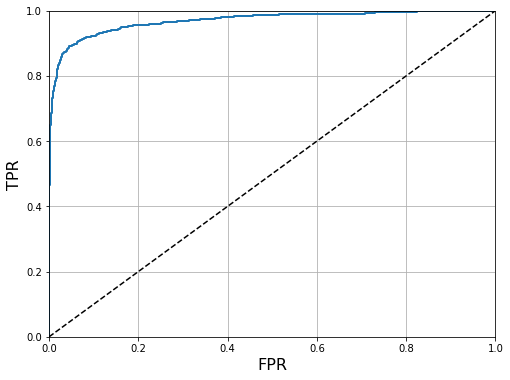

roc_auc_score:  0.9693789129351619


In [19]:
from sklearn.metrics import roc_curve, roc_auc_score

def evaluate2(perceptron, x):
    w = perceptron.ws[-1]
    x = np.c_[np.ones(len(x)), x]
    y = perceptron(w, x)
    return y

y_pred2 = evaluate2(perceptron, X_test)
fpr, tpr, thresholds = roc_curve(y_test_5, y_pred2)

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') 
    plt.axis([0, 1, 0, 1])                                    
    plt.xlabel('FPR', fontsize=16) 
    plt.ylabel('TPR', fontsize=16)    
    plt.grid(True)                                            

plt.figure(figsize=(8, 6))                         
plot_roc_curve(fpr, tpr)              
plt.show()

print ("roc_auc_score: ", roc_auc_score(y_test_5, y_pred2))

A widely used metric to compare classifiers is the area under the ROC curve, since it indicates how robust a model is. The straight line represents a *naive* model that we can use as a baseline. How you can see the area under the ROC curve of this model is $0.5$, so any model we make should exceed this value. The closer the curve is to the upper left corner, the larger the area and the better the model.